In [3]:
import kagglehub
import zipfile
import os
import shutil

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/har70")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/har70


In [ ]:
# Source path where the dataset is located
source_path = "/root/.cache/kagglehub/datasets/joebeachcapital/har70/versions/1"

# Destination folder in Google Drive
destination_path = "/content/drive/MyDrive/ANN LAB/ANN_LAB_FINAL/har70plus"

# Ensure the destination folder exists
os.makedirs(destination_path, exist_ok=True)

# Copy files from the source to the destination
for file_name in os.listdir(source_path):
    full_file_name = os.path.join(source_path, file_name)
    if os.path.isfile(full_file_name):  # Check if it's a file
        shutil.copy(full_file_name, destination_path)

print(f"Dataset copied to: {destination_path}")

In [ ]:
# Specify the path to the zip file
zip_file_path = "/content/drive/MyDrive/ANN LAB/ANN_LAB_FINAL/archive.zip"

# Specify the directory to extract the files to
extract_path = "/content/drive/MyDrive/ANN LAB/ANN_LAB_FINAL/har70plus"

# Create the extract directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

In [7]:
import pandas as pd

# Path to dataset files
dataset_path = "/input/har70/har70plus"  # Replace with the output of the `kagglehub.dataset_download` command

# List all files in the dataset directory
files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

In [8]:
files

['503.csv',
 '506.csv',
 '507.csv',
 '516.csv',
 '518.csv',
 '505.csv',
 '515.csv',
 '513.csv',
 '512.csv',
 '509.csv',
 '502.csv',
 '508.csv',
 '501.csv',
 '511.csv',
 '514.csv',
 '504.csv',
 '510.csv',
 '517.csv']

In [9]:
# Load a single CSV file for demonstration
file_path = os.path.join(dataset_path, files[0])
data = pd.read_csv(file_path)

In [10]:
data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-29 14:42:07.460,-0.971680,-0.072266,-0.175781,-1.712158,-0.120117,1.502686,6
1,2021-03-29 14:42:07.480,-1.364746,0.182861,-0.377197,-1.580322,-0.170166,-0.145508,6
2,2021-03-29 14:42:07.500,-1.249512,0.182129,-0.466553,-1.052734,-0.261719,-0.783691,6
3,2021-03-29 14:42:07.520,-0.841553,-0.026855,-0.445557,-0.863281,-0.132568,-0.416992,6
4,2021-03-29 14:42:07.539,-0.669189,-0.068115,-0.380371,-0.720215,-0.083496,-0.291504,6


**Preprocessing**

In [21]:
data = pd.concat([pd.read_csv(os.path.join(dataset_path, f)) for f in sorted(files)], ignore_index=True)

In [22]:
data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [23]:
data.shape

(2259597, 8)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259597 entries, 0 to 2259596
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 137.9+ MB


In [22]:
data.isna().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [25]:
unique_values = sorted(data['label'].unique())
print(f"Unique values in label: {unique_values}")

Unique values in label: [1, 3, 4, 5, 6, 7, 8]


In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Split into X and y
# Drop 'timestamp' and 'label' from X
X = data.drop(['timestamp', 'label'], axis=1)

# y is the label column
y = data['label']

In [31]:
# 2. Normalize the features using StandardScaler (z-score normalization)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to a DataFrame (optional, but useful for debugging or further use)
# X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [52]:
import numpy as np
from collections import Counter

# Parameters
window_size = 100
step_size = 10

# Convert to NumPy arrays for efficiency
X_array = X_normalized
y_array = y.values

# Lists to hold sequences and labels
X_seq = []
y_seq = []

In [53]:
# Slide over the data
for start in range(0, len(X_array) - window_size + 1, step_size):
    end = start + window_size
    
    # Get window of sensor data
    X_window = X_array[start:end]
    
    # Get label for the window — here, use most frequent label in the window
    y_window = y_array[start:end]
    most_common_label = Counter(y_window).most_common(1)[0][0]
    
    # Store
    X_seq.append(X_window)
    y_seq.append(most_common_label)

# Convert to arrays
X_seq = np.array(X_seq)  # shape: (num_sequences, window_size, num_features)
y_seq = np.array(y_seq)  # shape: (num_sequences,)

In [54]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Fit label encoder
le = LabelEncoder()
y_seq_encoded = le.fit_transform(y_seq)

# Check mapping (optional)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {1: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6}


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count class instances
class_counts = Counter(y_seq_encoded)  # or y_seq_encoded if already encoded

# Print counts
print("Class counts:")
for label, count in sorted(class_counts.items()):
    print(f"Class {label}: {count} samples")

Class counts:
Class 0: 108519 samples
Class 1: 5697 samples
Class 2: 465 samples
Class 3: 495 samples
Class 4: 42093 samples
Class 5: 48363 samples
Class 6: 20318 samples


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


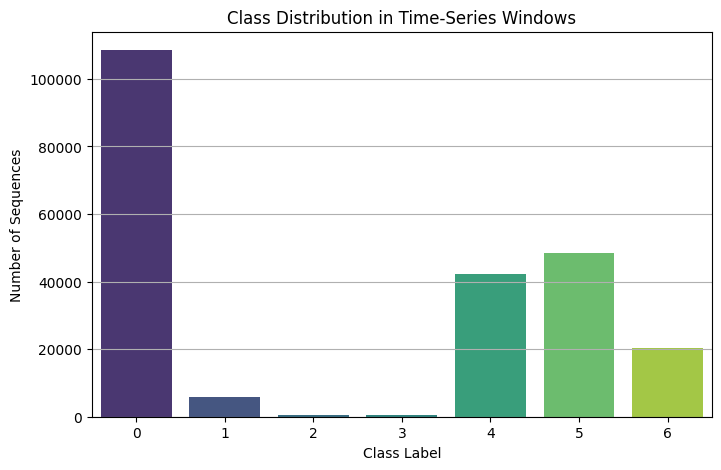

In [56]:
# Bar plot of class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Class Distribution in Time-Series Windows")
plt.xlabel("Class Label")
plt.ylabel("Number of Sequences")
plt.grid(axis='y')
plt.show()

In [57]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_seq_encoded),
    y=y_seq_encoded
)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {0: 0.297446266815686, 1: 5.665889315178415, 2: 69.41628264208909, 3: 65.2092352092352, 4: 0.7668394134077264, 5: 0.6674228527711562, 6: 1.588668738486634}


In [58]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq_encoded, test_size=0.2, random_state=42, stratify=y_seq_encoded
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (180760, 100, 6)
Testing data shape: (45190, 100, 6)


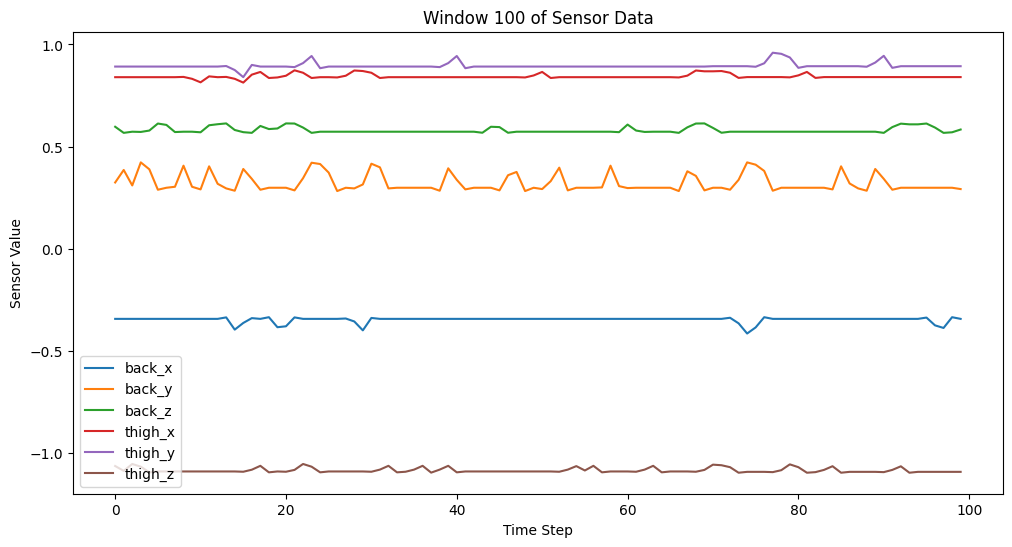

In [79]:
# Example: Plotting a single window of data for visualization
window_index = 100  # Choose a window index to plot
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(X_train[window_index, :, i], label=['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z'][i])
plt.title(f'Window {window_index} of Sensor Data')
plt.xlabel('Time Step')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

In [64]:
y_train.shape, y_test.shape

((180760,), (45190,))

**LSTM**

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Get input/output dimensions
timesteps = X_train.shape[1]
features = X_train.shape[2]
num_classes = len(np.unique(y_train))

# Build the model
model = Sequential([
    LSTM(64, input_shape=(timesteps, features), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # final classification layer
])

# Compile it
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [74]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/10
2825/2825 ━━━━━━━━━━━━━━━━━━━━ 313s 109ms/step - accuracy: 0.5271 - loss: 1.1198 - val_accuracy: 0.8790 - val_loss: 0.5220
Epoch 2/10
2825/2825 ━━━━━━━━━━━━━━━━━━━━ 319s 108ms/step - accuracy: 0.8049 - loss: 0.7276 - val_accuracy: 0.8586 - val_loss: 0.4890
Epoch 3/10
2825/2825 ━━━━━━━━━━━━━━━━━━━━ 309s 109ms/step - accuracy: 0.8275 - loss: 0.6104 - val_accuracy: 0.8422 - val_loss: 0.4628
Epoch 4/10
2825/2825 ━━━━━━━━━━━━━━━━━━━━ 306s 108ms/step - accuracy: 0.8659 - loss: 0.4467 - val_accuracy: 0.9049 - val_loss: 0.2688
Epoch 5/10
2825/2825 ━━━━━━━━━━━━━━━━━━━━ 305s 108ms/step - accuracy: 0.8735 - loss: 0.3564 - val_accuracy: 0.9039 - val_loss: 0.2598
Epoch 6/10
2825/2825 ━━━━━━━━━━━━━━━━━━━━ 307s 109ms/step - accuracy: 0.8777 - loss: 0.3533 - val_accuracy: 0.9072 - val_loss: 0.2787
Epoch 7/10
2825/2825 ━━━━━━━━━━━━━━━━━━━━ 319s 108ms/step - accuracy: 0.8901 - loss: 0.2790 - val_accuracy: 0.9109 - val_loss: 0.2501
Epoch 8/10
2825/2825 ━━━━━━━━━━━━━━━━━━━━ 303s 107ms/step - ac

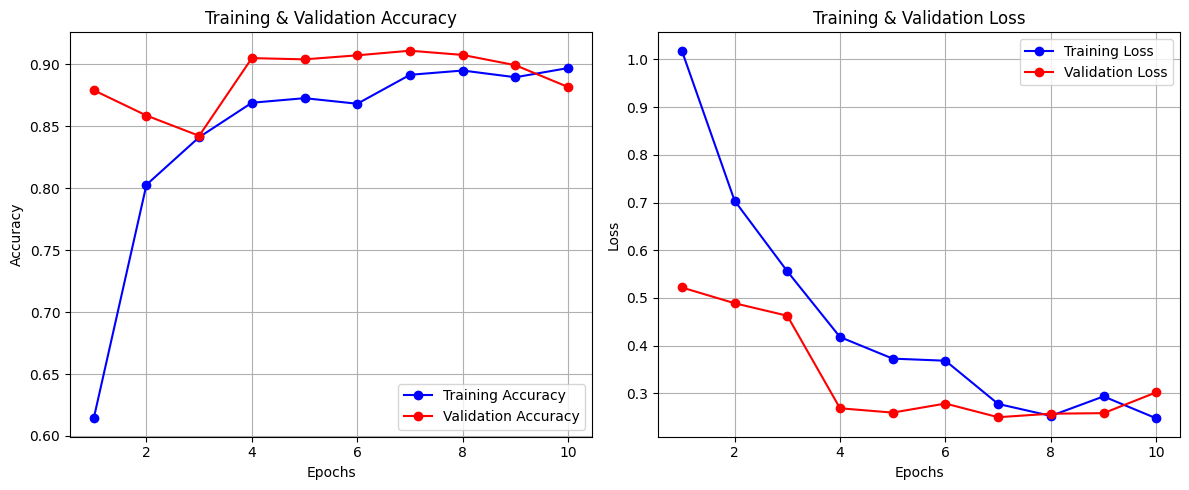

In [75]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**CNN**

In [80]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(timesteps, features, 1), padding='same'), # Add padding='same' to the first Conv2D layer
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # Add padding='same' to the second Conv2D layer
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
])
# Define the learning rate
learning_rate = 0.001

# Compile the model with a custom learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 6, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 3, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 3, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,159 (879.53 KB)

 Trainable params: 224,903 (878.53 KB)

 Non-trainable params: 256 (1.00 KB)

In [82]:
# Train the model
history = model.fit(X_train_cnn, y_train, epochs=5, batch_size=32, class_weight=class_weight_dict, validation_split=0.2)

Epoch 1/5
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 90s 19ms/step - accuracy: 0.7148 - loss: 0.8875 - val_accuracy: 0.8028 - val_loss: 0.5087
Epoch 2/5
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 86s 19ms/step - accuracy: 0.7979 - loss: 0.5519 - val_accuracy: 0.8639 - val_loss: 0.3909
Epoch 3/5
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 86s 19ms/step - accuracy: 0.8367 - loss: 0.3932 - val_accuracy: 0.7452 - val_loss: 0.6380
Epoch 4/5
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 86s 19ms/step - accuracy: 0.8494 - loss: 0.3624 - val_accuracy: 0.8882 - val_loss: 0.2731
Epoch 5/5
4519/4519 ━━━━━━━━━━━━━━━━━━━━ 86s 19ms/step - accuracy: 0.8667 - loss: 0.2834 - val_accuracy: 0.8936 - val_loss: 0.2780


NameError: name 'cnn_model' is not defined

In [84]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

1413/1413 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8910 - loss: 0.2825
Test Accuracy: 0.89


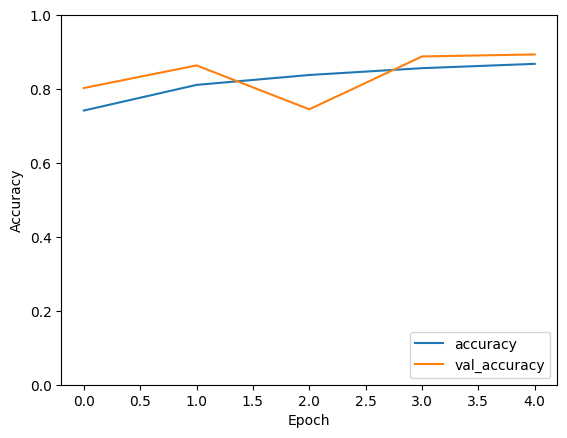

In [85]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [86]:
# Step 1: Predict on test data
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

1413/1413 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


In [95]:
# Then relabel ticks with actual class labels
original_labels = le.inverse_transform(range(7))  # le is your LabelEncoder

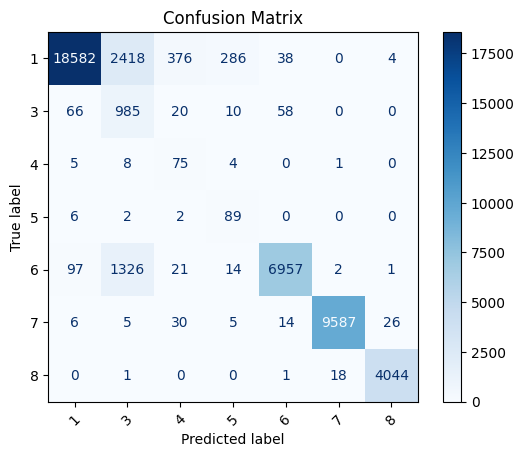


Classification Report:
              precision    recall  f1-score   support

  Activity 1       0.99      0.86      0.92     21704
  Activity 3       0.21      0.86      0.33      1139
  Activity 4       0.14      0.81      0.24        93
  Activity 5       0.22      0.90      0.35        99
  Activity 6       0.98      0.83      0.90      8418
  Activity 7       1.00      0.99      0.99      9673
  Activity 8       0.99      1.00      0.99      4064

    accuracy                           0.89     45190
   macro avg       0.65      0.89      0.68     45190
weighted avg       0.97      0.89      0.92     45190



In [97]:
# Get unique labels from y_test
num_classes = len(original_labels)

# Create display labels based on the unique labels
display_labels = original_labels

conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels) # Use the corrected display labels
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Step 3: Classification report
# Adjust the target names to reflect the correct number of classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=[f'Activity {i}' for i in display_labels])) # Use display_labels here

### **Misclassifications and Class Imbalance**

An analysis of the classification results and confusion matrix reveals that the model exhibits a higher rate of mispredictions particularly among classes **3, 4, and 5**. This performance degradation can be attributed primarily to **significant class imbalance** in the dataset. In imbalanced scenarios, the model tends to become biased toward majority classes, leading to insufficient learning and poor generalization for underrepresented classes.

To address this issue, the following **class imbalance mitigation techniques** are recommended:

* **Class Weighting:** Apply class weights during model training to penalize misclassification of minority classes more heavily.
* **Oversampling:** Use techniques such as **SMOTE (Synthetic Minority Over-sampling Technique)** or **random oversampling** to increase the representation of minority classes.
* **Undersampling:** Reduce the size of majority classes to balance the dataset, while taking care to preserve temporal structure in time-series data.
* **Data Augmentation:** Generate synthetic but realistic samples using domain-specific augmentation methods (e.g., jittering, time warping).

Implementing these strategies can lead to more balanced learning across all activity classes, thereby improving the model's ability to correctly classify instances from underrepresented categories such as classes 3, 4, and 5.
